In [170]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import calendar
import datetime

%matplotlib inline

In [171]:
big_df = pd.read_csv('PPD_Crime_Incidents_2006-Present.csv')

In [172]:
df = big_df.sample(frac = 0.1, random_state = 5)
df = df.reset_index(drop = True)
len(df)

213700

In [173]:
df.columns

Index([u'DC_DIST', u'PSA', u'DISPATCH_DATE_TIME', u'DISPATCH_DATE',
       u'DISPATCH_TIME', u'HOUR_', u'DC_KEY', u'LOCATION_BLOCK',
       u'UCR_GENERAL', u'TEXT_GENERAL_CODE', u'SHAPE', u'Police Districts'],
      dtype='object')

In [174]:
df.isnull().sum()

DC_DIST                  0
PSA                      0
DISPATCH_DATE_TIME       0
DISPATCH_DATE            0
DISPATCH_TIME            0
HOUR_                    0
DC_KEY                   0
LOCATION_BLOCK           0
UCR_GENERAL             10
TEXT_GENERAL_CODE       10
SHAPE                 1462
Police Districts      1731
dtype: int64

In [176]:
df.head(1)

,DC_DIST,PSA,DISPATCH_DATE_TIME,DISPATCH_DATE,DISPATCH_TIME,HOUR_,DC_KEY,LOCATION_BLOCK,UCR_GENERAL,TEXT_GENERAL_CODE,SHAPE,Police Districts
0,12,4,02/23/2011 12:15:00 PM,2011-02-23,12:15:00,12,201112014528,6000 BLOCK BALTIMORE AVE,800.0,Other Assaults,POINT (-75.243429 39.944651),9.0


In [177]:
df['DISPATCH_DATE_TIME'].head(1)

0    02/23/2011 12:15:00 PM
Name: DISPATCH_DATE_TIME, dtype: object

In [178]:
df = df.drop(['DISPATCH_DATE', 'DISPATCH_TIME', 'DC_KEY', 'LOCATION_BLOCK', 'SHAPE', \
              'HOUR_'], axis = 1)

In [180]:
df.head(1)

,DC_DIST,PSA,DISPATCH_DATE_TIME,UCR_GENERAL,TEXT_GENERAL_CODE,Police Districts
0,12,4,02/23/2011 12:15:00 PM,800.0,Other Assaults,9.0


In [181]:
dow = []
month = []
hour = []
year = []
df['DISPATCH_DATE_TIME'] = df['DISPATCH_DATE_TIME'].apply(lambda x: pd.to_datetime(x))
for i in range(len(df)):
    xday = df['DISPATCH_DATE_TIME'][i].dayofweek
    dow.append(xday)
    xmonth = df['DISPATCH_DATE_TIME'][i].month
    month.append(xmonth)
    xhour = df['DISPATCH_DATE_TIME'][i].hour
    hour.append(xhour)
    xyear = df['DISPATCH_DATE_TIME'][i].year
    year.append(xyear)
df['day'] = dow
df['hour'] = hour
df['month'] = month
df['year'] = year

In [182]:
df = df.drop(['DISPATCH_DATE_TIME'], axis = 1)

In [183]:
df['year'].value_counts()

2006    23440
2008    22376
2007    22343
2009    20488
2010    19945
2012    19758
2011    19662
2013    18464
2015    18385
2014    18379
2016    10460
Name: year, dtype: int64

In [184]:
df.head(1)

,DC_DIST,PSA,UCR_GENERAL,TEXT_GENERAL_CODE,Police Districts,day,hour,month,year
0,12,4,800.0,Other Assaults,9.0,2,12,2,2011


In [69]:
# y_raw = df['TEXT_GENERAL_CODE']
# df = df.drop(['TEXT_GENERAL_CODE'], axis = 1)

In [185]:
df.dtypes

DC_DIST                int64
PSA                   object
UCR_GENERAL          float64
TEXT_GENERAL_CODE     object
Police Districts     float64
day                    int64
hour                   int64
month                  int64
year                   int64
dtype: object

In [186]:
df['UCR_GENERAL'] = df['UCR_GENERAL'].astype('object')
df['Police Districts'] = df['Police Districts'].astype('object')
df['DC_DIST'] = df['DC_DIST'].astype('object')

In [187]:
df.dtypes

DC_DIST              object
PSA                  object
UCR_GENERAL          object
TEXT_GENERAL_CODE    object
Police Districts     object
day                   int64
hour                  int64
month                 int64
year                  int64
dtype: object

In [188]:
df['month'].value_counts()

7     20162
5     19549
6     19416
8     19298
4     18901
3     18228
9     17571
10    17565
1     16928
11    15726
2     15196
12    15160
Name: month, dtype: int64

In [189]:
df_2015 = df[df['year'] == 2015]

In [190]:
len(df_2015)

18385

In [191]:
df_2015.columns

Index([u'DC_DIST', u'PSA', u'UCR_GENERAL', u'TEXT_GENERAL_CODE',
       u'Police Districts', u'day', u'hour', u'month', u'year'],
      dtype='object')

In [192]:
df_month = pd.DataFrame(df_2015['month'].value_counts())
df_month.columns = ['count']
df_month['month'] = df_month.index
df_month = df_month.reset_index(drop = True)
order = range(12)
all_months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
month_dict = dict(zip(all_months, order))
df_month['order'] = df_month['month'].apply(lambda x: month_dict[x])
df_month = df_month.sort('order')
del df_month['order']
df_month['names'] = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', \
            'September', 'October', 'November', 'December']
df_month = df_month.set_index(df_month['names'], drop = True)
del df_month['month']


/Users/Rebecca/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


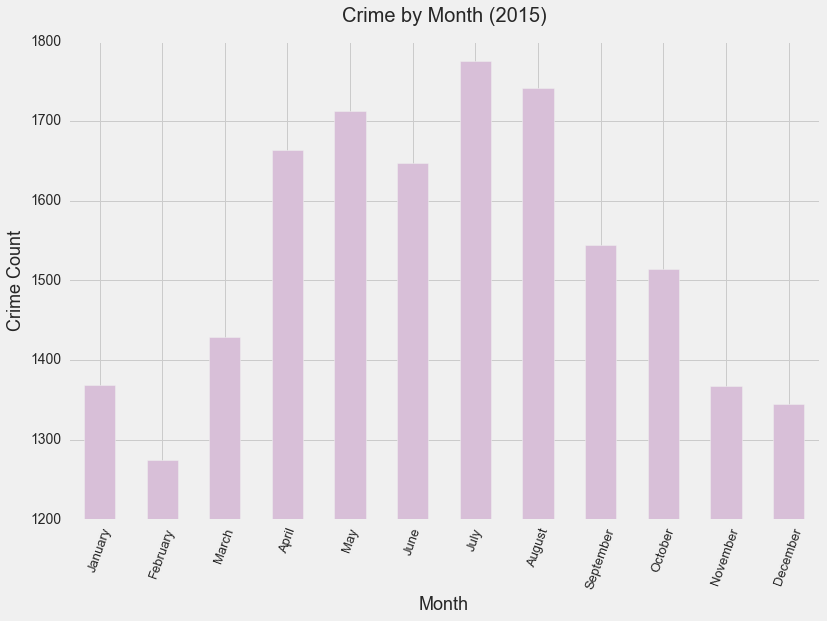

In [224]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

df_month['count'].plot.bar(color = 'thistle')

plt.title('Crime by Month (2015)', fontsize = 20, y = 1.03)

# y label
plt.ylabel('Crime Count', fontsize = 18)

# x label
plt.xlabel('Month', fontsize = 18)
plt.axhline(0, color='black', alpha = 0.6)
plt.xticks(rotation=70, fontsize = 13)

plt.ylim([1200, 1800])
plt.show()

In [195]:
df_day = pd.DataFrame(df_2015['day'].value_counts())
df_day.columns = ['count']
df_day['day'] = df_day.index
df_day = df_day.reset_index(drop = True)
order = range(7)
# all_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', \
#               'November', 'December']
all_days = [0, 1, 2, 3, 4, 5, 6]
day_dict = dict(zip(all_days, order))
df_day['order'] = df_day['day'].apply(lambda x: day_dict[x])
df_day = df_day.sort('order')
del df_day['order']
df_day['names'] = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_day = df_day.set_index(df_day['names'], drop = True)
del df_day['day']


/Users/Rebecca/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


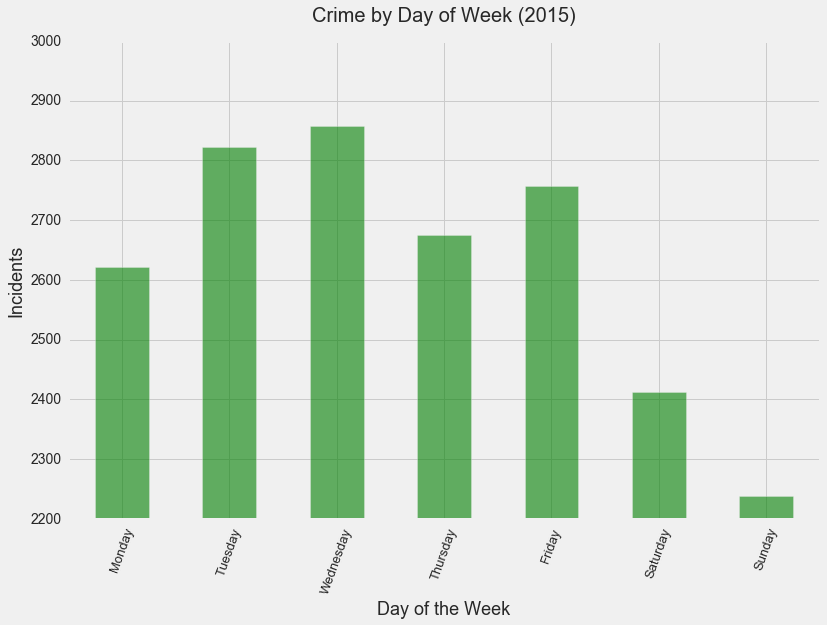

In [202]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

df_day['count'].plot.bar(color = 'green', alpha = 0.6)

plt.title('Crime by Day of Week (2015)', fontsize = 20, y = 1.03)

# y label
plt.ylabel('Incidents', fontsize = 18)

# x label
plt.xlabel('Day of the Week', fontsize = 18)
plt.axhline(0, color='black', alpha = 0.6)
plt.xticks(rotation=70, fontsize = 13)

plt.ylim([2200, 3000])

plt.show()

In [198]:
df_hour = pd.DataFrame(df_2015['hour'].value_counts())
df_hour.columns = ['count']
df_hour['hour'] = df_hour.index
df_hour = df_hour.reset_index(drop = True)
order = range(24)
# all_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', \
#               'November', 'December']
all_hours = range(24)
hour_dict = dict(zip(all_hours, order))
df_hour['order'] = df_hour['hour'].apply(lambda x: hour_dict[x])
df_hour = df_hour.sort('order')
del df_hour['order']
df_hour = df_hour.set_index(df_hour['hour'], drop = True)
del df_hour['hour']


/Users/Rebecca/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


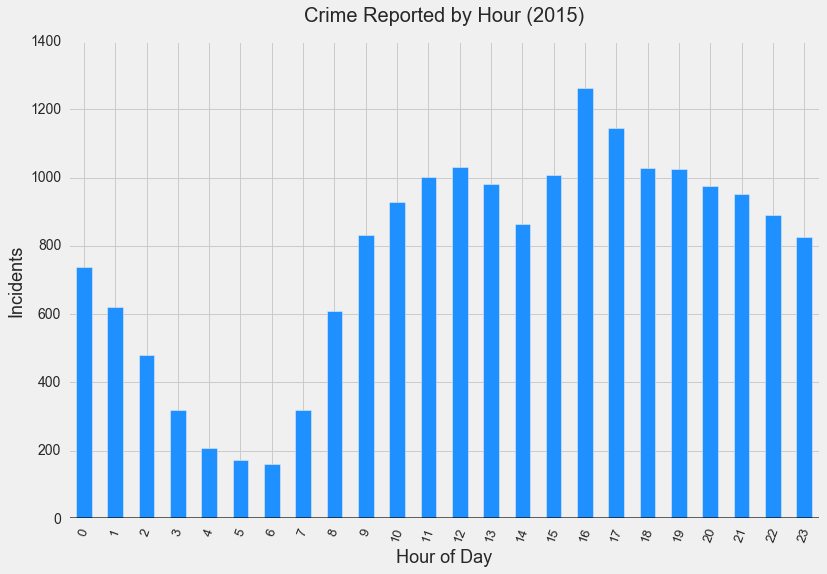

In [199]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

df_hour['count'].plot.bar(color = 'dodgerblue')

plt.title('Crime Reported by Hour (2015)', fontsize = 20, y = 1.03)

# y label
plt.ylabel('Incidents', fontsize = 18)

# x label
plt.xlabel('Hour of Day', fontsize = 18)
plt.axhline(0, color='black', alpha = 0.6)
plt.xticks(rotation=70, fontsize = 13)

plt.show()

In [200]:
df_winter = df_2015[(df_2015['month'] == 12) | (df_2015['month'] == 1) | (df_2015['month'] == 2)]
df_spring = df_2015[(df_2015['month'] == 3) | (df_2015['month'] == 4) | (df_2015['month'] == 5)]
df_summer = df_2015[(df_2015['month'] == 6) | (df_2015['month'] == 7) | (df_2015['month'] == 8)]
df_fall = df_2015[(df_2015['month'] == 9) | (df_2015['month'] == 10) | (df_2015['month'] == 11)]

In [109]:
def get_plot_df(df):
    df_hour = pd.DataFrame(df['hour'].value_counts())
    df_hour.columns = ['count']
    df_hour['hour'] = df_hour.index
    df_hour = df_hour.reset_index(drop = True)
    order = range(24)
    all_hours = range(24)
    hour_dict = dict(zip(all_hours, order))
    df_hour['order'] = df_hour['hour'].apply(lambda x: hour_dict[x])
    df_hour = df_hour.sort('order')
    del df_hour['order']
    df_hour = df_hour.set_index(df_hour['hour'], drop = True)
    del df_hour['hour']
    return df_hour

In [212]:
df_2015 = df_2015.reset_index(drop = True)
df_2015.head(1)

,DC_DIST,PSA,UCR_GENERAL,TEXT_GENERAL_CODE,Police Districts,day,hour,month,year
0,25,4,600,Theft from Vehicle,18,4,12,9,2015


In [215]:
violent  = ['Other Assaults',
'Aggravated Assault No Firearm',
'Robbery No Firearm',
'Robbery Firearm',
'Aggravated Assault Firearm',
'Rape', 
'Arson',
'Homicide - Criminal',
'Homicide - Gross Negligence',
'Homicide - Justifiable']

other = ['All Other Offenses',
'Vandalism/Criminal Mischief',
'Narcotic / Drug Law Violations',
'Fraud',
'Burglary Residential',
'Recovered Stolen Motor Vehicle',
'DRIVING UNDER THE INFLUENCE',
'Motor Vehicle Theft',
'Disorderly Conduct',
'Burglary Non-Residential',
'Weapon Violations',
'Prostitution and Commercialized Vice',
'Other Sex Offenses (Not Commercialized)',
'Vagrancy/Loitering',
'Liquor Law Violations',
'Public Drunkenness',
'Forgery and Counterfeiting',
'Embezzlement',
'Offenses Against Family and Children',
'Receiving Stolen Property',
'Gambling Violations']

theft = ["Thefts", "Theft from Vehicle", "Burglary Residential"]

In [221]:
def separate_crimes(df, crime_list):
    df_crime = pd.DataFrame()
    for i in range(len(df)):
        if df['TEXT_GENERAL_CODE'][i] in crime_list:
            lil_df = pd.DataFrame(df.loc[i, :])
            df_crime = pd.concat([df_crime, lil_df], axis = 0)
        else:
            continue
    return df_crime 

In [222]:
df_violent = separate_crimes(df_2015, violent)
df_other = separate_crimes(df_2015, other)
df_theft = separate_crimes(df_2015, theft)

KeyboardInterrupt: 

In [ ]:
df_violent.head(1)

In [139]:
df_winter_hour = get_plot_df(df_winter)
df_spring_hour = get_plot_df(df_spring)
df_summer_hour = get_plot_df(df_summer)
df_fall_hour = get_plot_df(df_fall)

season_list = [df_winter_hour, df_spring_hour, df_summer_hour, df_fall_hour]

big_seasons = pd.DataFrame()

for season in season_list:
    big_seasons = pd.concat([big_seasons, season], axis = 1)
    
big_seasons.columns = ['winter', 'spring', 'summer', 'fall'] 
big_seasons.head()

/Users/Rebecca/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,winter,spring,summer,fall
hour,,,,
0,150,181,228,180
1,109,148,214,149
2,94,118,149,120
3,79,66,95,80
4,52,49,57,51


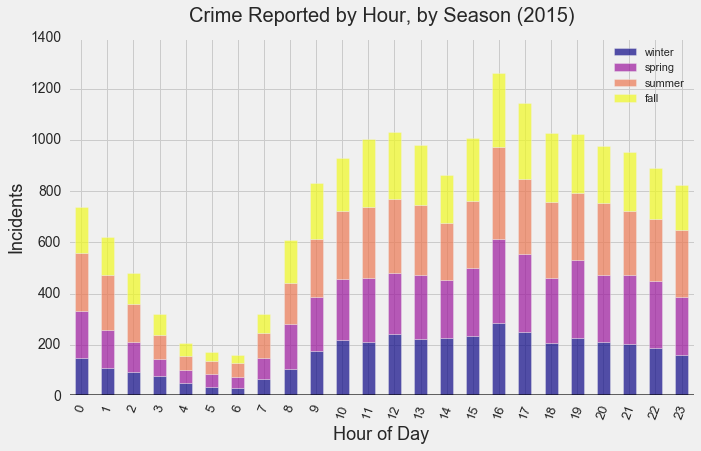

In [154]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

big_seasons[['winter', 'spring', 'summer', 'fall']].plot(kind = 'bar', alpha = 0.7, \
    stacked = True, colormap = 'plasma', figsize = (10,6))

plt.title('Crime Reported by Hour, by Season (2015)', fontsize = 20, y = 1.03)

# y label
plt.ylabel('Incidents', fontsize = 18)

# x label
plt.xlabel('Hour of Day', fontsize = 18)
plt.axhline(0, color='black', alpha = 0.6)
plt.xticks(rotation=70, fontsize = 13)
plt.legend(loc='upper right', fontsize = 11)
plt.show()

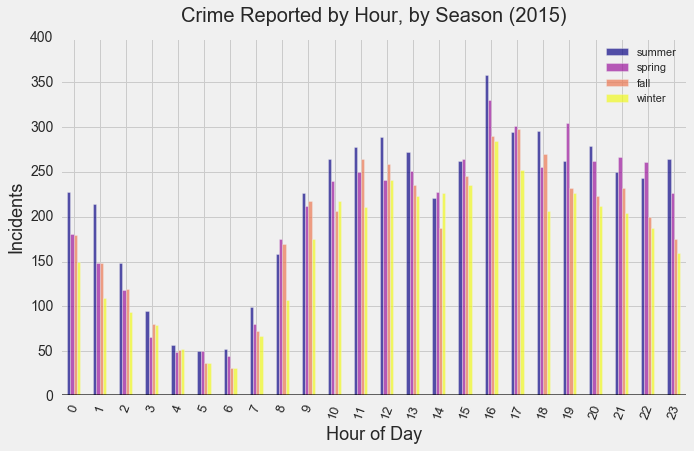

In [159]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

# df_winter_hour['count'].plot.bar(color = 'blue').stacked()
# df_spring_hour['count'].plot.bar(color = 'green')
# df_summer_hour['count'].plot.bar(color = 'lightgreen')
# df_fall_hour['count'].plot.bar(color = 'orange')

big_seasons[['summer', 'spring', 'fall', 'winter']].plot(kind = 'bar', alpha = 0.7, \
            stacked = False, colormap = 'plasma', figsize = (10,6))

# big_seasons['summer'].plot.bar(alpha = 0.7, color = 'lightgreen')
# big_seasons['spring'].plot.bar(alpha = 0.7, color = 'green')
# big_seasons['fall'].plot.bar(alpha = 0.7, color = 'orange')
# big_seasons['winter'].plot.bar(alpha = 0.7, color = 'blue', stacked = True)

plt.title('Crime Reported by Hour, by Season (2015)', fontsize = 20, y = 1.03)

# y label
plt.ylabel('Incidents', fontsize = 18)

# x label
plt.xlabel('Hour of Day', fontsize = 18)
plt.axhline(0, color='black', alpha = 0.6)
plt.xticks(rotation=70, fontsize = 13)
plt.legend(loc='upper right', fontsize = 11)
plt.show()

In [169]:
len(y_raw)

213700

In [168]:
def 

# df_winter_hour = get_plot_df(df_winter)
# df_spring_hour = get_plot_df(df_spring)
# df_summer_hour = get_plot_df(df_summer)
# df_fall_hour = get_plot_df(df_fall)

# season_list = [df_winter_hour, df_spring_hour, df_summer_hour, df_fall_hour]

# big_seasons = pd.DataFrame()

# for season in season_list:
#     big_seasons = pd.concat([big_seasons, season], axis = 1)
    
# big_seasons.columns = ['winter', 'spring', 'summer', 'fall'] 
# big_seasons.head()

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

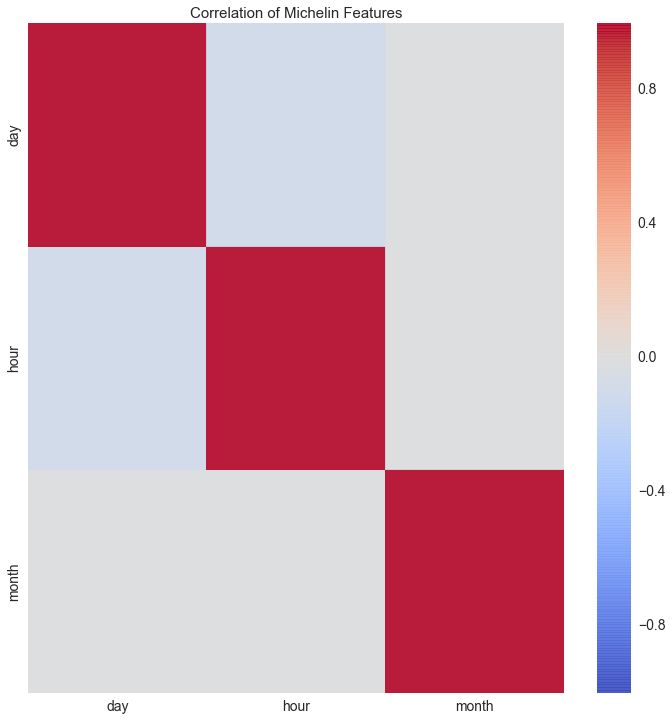

In [52]:
plt.figure(figsize=(12,12))
sns.set(font_scale=1.4)
ax = sns.heatmap(df.corr(), cmap = "coolwarm", alpha = 0.9)

ax.axes.set_title("Correlation of Michelin Features", size = 15)

plt.show()

In [14]:
cols = df.columns

big_counts = []

for column in cols:
    for next_column in cols:
        if column != next_column:
            g = df[[column, next_column]].groupby(column) 
            counts = g.transform(lambda x: len(x.unique()))
            big_counts.append(counts)
        else:
            continue

big_counts